In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

file_path = r"C:\Users\18014\Desktop\Masters\D600 - Statistical Data Mining\Task 3\D600 Task 3 Dataset 1 Housing Information.csv"

df = pd.read_csv(file_path)

In [2]:
df

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [5]:
#Defining the continuous variables for PCA
X = df[['SquareFootage','NumBathrooms', 'NumBedrooms', 'BackyardSpace',
        'CrimeRate', 'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter',
        'EmploymentRate', 'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities',
        'TransportAccess', 'PreviousSalePrice', 'Windows']]


#Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Applying PCA
pca = PCA(n_components=None)
X_pca_all = pca.fit_transform(X_scaled)

In [7]:
#The data needs to be a dataframe, not an array
#Convert back to dataframe to save
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.to_excel(r'C:\Users\18014\Desktop\standardized_data.xlsx', index=False)

In [9]:
#Describing independent variables
descriptive_stats_independent = X.describe()

# Display the statistics
print(descriptive_stats_independent)

       SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace    CrimeRate  \
count    7000.000000   7000.000000  7000.000000    7000.000000  7000.000000   
mean     1048.947459      2.131397     3.008571     511.507029    31.226194   
std       426.010482      0.952561     1.021940     279.926549    18.025327   
min       550.000000      1.000000     1.000000       0.390000     0.030000   
25%       660.815000      1.290539     2.000000     300.995000    17.390000   
50%       996.320000      1.997774     3.000000     495.965000    30.385000   
75%      1342.292500      2.763997     4.000000     704.012500    43.670000   
max      2874.700000      5.807239     7.000000    1631.360000    99.730000   

       SchoolRating    AgeOfHome  DistanceToCityCenter  EmploymentRate  \
count   7000.000000  7000.000000           7000.000000     7000.000000   
mean       6.942923    46.797046             17.475337       93.711349   
std        1.888148    31.779701             12.024985        4.50

In [11]:
#Describing Price, the dependent variable
dependent_variable = df['Price']
descriptive_stats_dependent = dependent_variable.describe()

print(descriptive_stats_dependent)

count    7.000000e+03
mean     3.072820e+05
std      1.501734e+05
min      8.500000e+04
25%      1.921075e+05
50%      2.793230e+05
75%      3.918781e+05
max      1.046676e+06
Name: Price, dtype: float64


In [13]:
#Calculating cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
print(f'Cumulative Explained Variance: {cumulative_explained_variance}')

#Number of components that explain at least 90% variance
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f'Number of components explaining at least 90% variance: {n_components_90}')

Cumulative Explained Variance: [0.21556522 0.30603955 0.38152959 0.45259058 0.52011026 0.58693521
 0.64922713 0.71026119 0.77049561 0.8268939  0.8821449  0.92303741
 0.95716087 0.98776668 1.        ]
Number of components explaining at least 90% variance: 12


In [15]:
#Creating a matrix of all principal components
pca_matrix = pd.DataFrame(X_pca_all, columns=[f'PC{i+1}' for i in range(X_pca_all.shape[1])])

print(pca_matrix.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.902343  0.333013 -1.569851  0.094842 -0.268075 -0.284527  1.616614   
1 -0.804669 -0.665626 -0.878430 -1.677154  0.441913 -0.022723 -0.506909   
2 -0.282699 -1.931889 -1.579538  0.933843  1.210100  1.383809  1.112252   
3 -1.055752 -0.075489 -0.216879 -0.200526 -0.015122 -0.576201 -0.545630   
4 -2.170138 -1.071303 -0.556838 -0.098562 -0.655281  0.985124  0.078494   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.610619 -0.246474  0.500900 -0.589744  0.497684 -0.165569  0.855532   
1  0.755633 -0.336947  1.481971  0.266378 -0.051247  0.448011  0.150985   
2  0.422386 -0.321725 -0.674668 -0.122049 -0.812482  0.337412 -0.801456   
3  1.414695 -0.347068  0.297748 -1.228864 -0.789727  0.365840 -0.130236   
4  0.234006 -1.448756 -1.008390  2.246380 -0.369723  0.467352  0.343461   

       PC15  
0  0.090008  
1 -0.707817  
2 -0.192023  
3 -0.229669  
4 -0.283988  


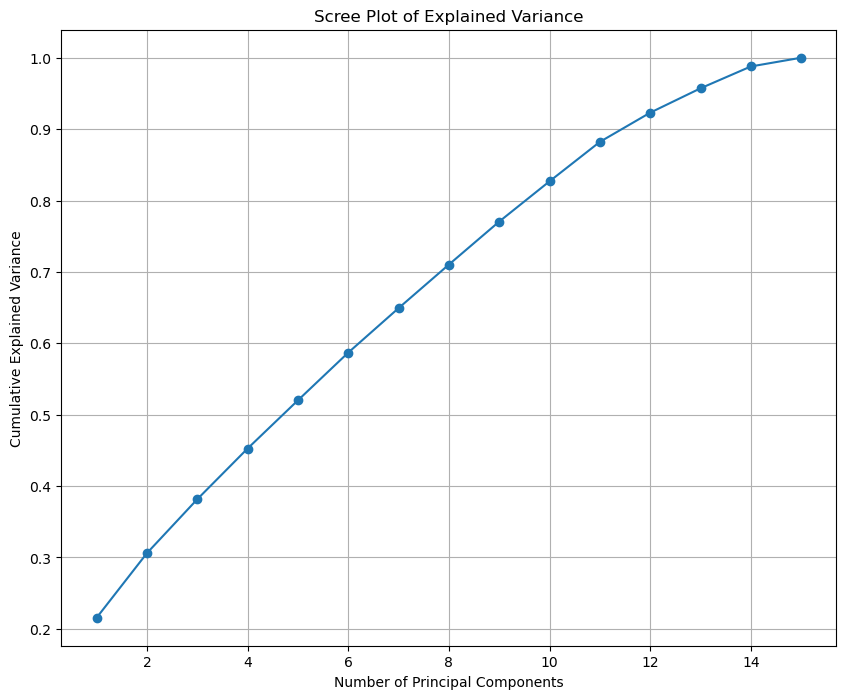

In [17]:
#Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

#Scree plot for visualizing the variance
plt.figure(figsize=(10,8))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='-')
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [19]:
#Looking at the variance of each principal component
explained_variance_each = pca.explained_variance_ratio_

for i, variance in enumerate(explained_variance_each):
    print(f'Principal Component {i+1}: {variance:.4f}')

Principal Component 1: 0.2156
Principal Component 2: 0.0905
Principal Component 3: 0.0755
Principal Component 4: 0.0711
Principal Component 5: 0.0675
Principal Component 6: 0.0668
Principal Component 7: 0.0623
Principal Component 8: 0.0610
Principal Component 9: 0.0602
Principal Component 10: 0.0564
Principal Component 11: 0.0553
Principal Component 12: 0.0409
Principal Component 13: 0.0341
Principal Component 14: 0.0306
Principal Component 15: 0.0122


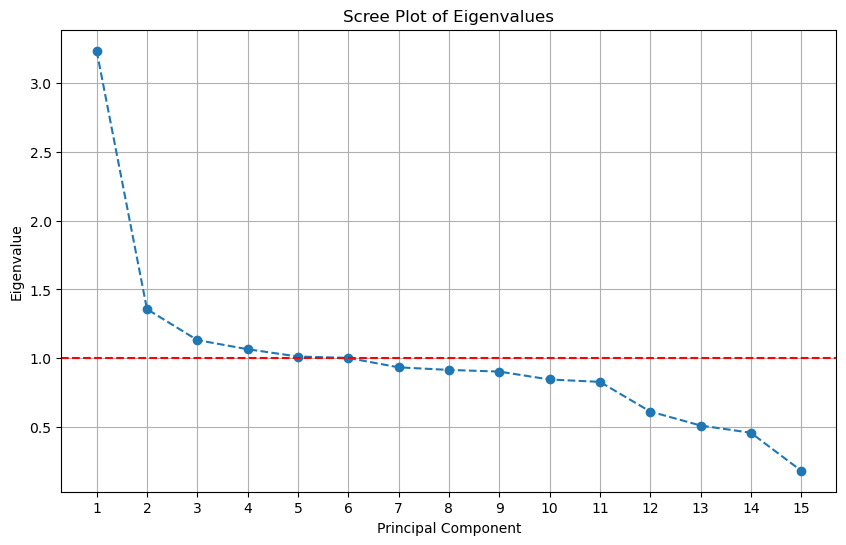

In [21]:
#Eigenvalues
eigenvalues = pca.explained_variance_

#Scree Plot of Eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--') #(This is the Kaiser line where the eivenvalue = 1)
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid()
plt.show()

In [23]:
eigenvalues

array([3.23394031, 1.35730882, 1.13251244, 1.06606718, 1.0129399 ,
       1.00251743, 0.9345122 , 0.91564176, 0.90364539, 0.8460953 ,
       0.82888336, 0.61347521, 0.51192504, 0.45915282, 0.183526  ])

In [25]:
#Displaying explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')

Explained Variance Ratio: [0.21556522 0.09047433 0.07549004 0.07106099 0.06751968 0.06682495
 0.06229191 0.06103406 0.06023442 0.0563983  0.055251   0.04089251
 0.03412346 0.03060581 0.01223332]


In [27]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]) 

In [29]:
# Assuming X_pca already contains the 6 principal components from PCA
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the dependent variable 'Price' back to the PCA dataframe
final_df = pd.concat([X_pca, df['Price']], axis=1)

In [31]:
#Train Test Split our dependent variable (price) and our 6 principal component variables
y = df['Price']

X = final_df.drop(columns=['Price'])
y = final_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


#Fitting the linear regression
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1976.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:01:06   Log-Likelihood:                -71558.
No. Observations:                5600   AIC:                         1.431e+05
Df Residuals:                    5593   BIC:                         1.432e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.074e+05   1146.784    268.021      0.0

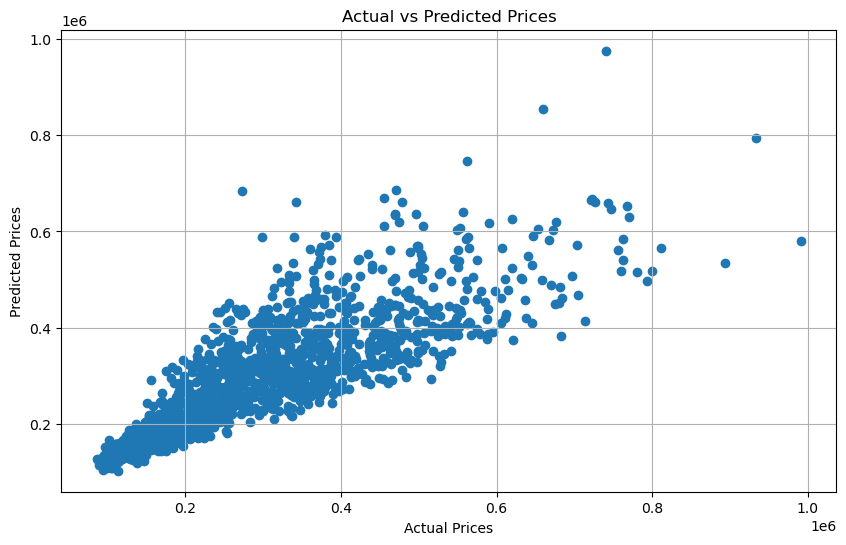

In [33]:
#Making predictions
y_pred = model.predict(sm.add_constant(X_test))

#Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

In [35]:
#Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6629445434.034388


In [37]:
import statsmodels.api as sm

#Backward elimination
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    print(model.summary())

    p_values = model.pvalues
    
    while p_values.max() > significance_level:
        remove_var = p_values.idxmax()
        X = X.drop(columns=remove_var)
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        print(model.summary())
        
    return model

final_model = backward_elimination(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1976.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:02:42   Log-Likelihood:                -71558.
No. Observations:                5600   AIC:                         1.431e+05
Df Residuals:                    5593   BIC:                         1.432e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.074e+05   1146.784    268.021      0.0

In [39]:
#Predictors after backward elimination
#Run the prediction on the test dataset using the optimized regression model from part F2 to give the accuracy of the prediction 
#model based on the mean squared error 
X_train_optimized = X_train[final_model.model.exog_names[1:]]
X_test_optimized = X_test[final_model.model.exog_names[1:]]

#Predictions on the training set
y_train_pred = final_model.predict(sm.add_constant(X_train_optimized))

#Predictions on the test set
y_test_pred = final_model.predict(sm.add_constant(X_test_optimized))

In [41]:
#MSE for training set
mse_train = mean_squared_error(y_train, y_train_pred)

#MSE for test set
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error for Training Set: {mse_train}')
print(f'Mean Squared Error for Test Set: {mse_test}')

Mean Squared Error for Training Set: 7356194870.711278
Mean Squared Error for Test Set: 6626095870.316331


In [43]:
#Calculating Variance Inflation Factor (VIF) for the predictor variables
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_optimized.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_optimized.values, i) for i in range(X_train_optimized.shape[1])]

print(vif_data)

  Feature       VIF
0     PC1  1.000082
1     PC2  1.000066
2     PC4  1.000115
3     PC6  1.000156
